# Библиотеки

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Метод бисекции

In [33]:
def bisection_method(f, a, b, tol):
    if f(a) * f(b) >= 0:
        raise ValueError("Функция должна иметь разные знаки на концах отрезка [a, b].")
    iterations = []
    while (b - a) / 2 > tol:
        midpoint = (a + b) / 2
        iterations.append(midpoint)
        if f(midpoint) == 0:
            return midpoint, iterations
        if f(midpoint) * f(a) < 0:
            b = midpoint
        else:
            a = midpoint
    return (a + b) / 2, iterations

# Метод Ньютона

In [34]:
def newton_method(f, df, x0, tol, max_iter=100):
    iterations = []
    x = x0
    for _ in range(max_iter):
        if df(x) == 0:
            break
        x = x - f(x) / df(x)
        iterations.append(x)
        if abs(f(x)) < tol:
            break
    return x, iterations

# Тесты

## Функции

In [35]:
# Примитивный тест: x² - 2 = 0 (легко находимое аналитическое решение)
def f_prim(x):
    return x ** 2 - 2

In [36]:
# Сложный тест: x³ - 2 = 0 (сложное аналитическое решение)
def f_complex(x):
    return x ** 3 - 2

## Производные

In [37]:
def df_prim(x):
    return 2 * x

In [38]:
def df_complex(x):
    return 3 * x ** 2

## Параметры

In [39]:
tests = [
    {
        'f': f_prim,
        'df': df_prim,
        'a': 1.0,
        'b': 2.0,
        'x0': 1.5,
        'title': 'Примитивный тест: x² - 2 = 0',
        'analytical': np.sqrt(2)
    },
    {
        'f': f_complex,
        'df': df_complex,
        'a': 1.0,
        'b': 2.0,
        'x0': 1.5,
        'title': 'Сложный тест: x³ - 2 = 0',
        'analytical': np.cbrt(2)
    },
    {
        'f': f_prim,
        'df': df_prim,
        'a': 1.0,
        'b': 2.0,
        'x0': -10,  # Плохое начальное приближение
        'title': 'Тест с плохим начальным приближением: x² - 2 = 0',
        'analytical': np.sqrt(2)
    }
]

# Отображение графиков

In [40]:
def vizualisation(iterations, method, place):
    plt.subplot(3, 2, place)
    plt.plot(iterations, test['f'](np.array(iterations)), 'o-', label=method)
    plt.axvline(test['analytical'], color='green', lw=0.5, linestyle='--', label='Аналитическое решение')
    plt.title(f"{test['title']}\n{method}")
    plt.xlabel('Итерации')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid()

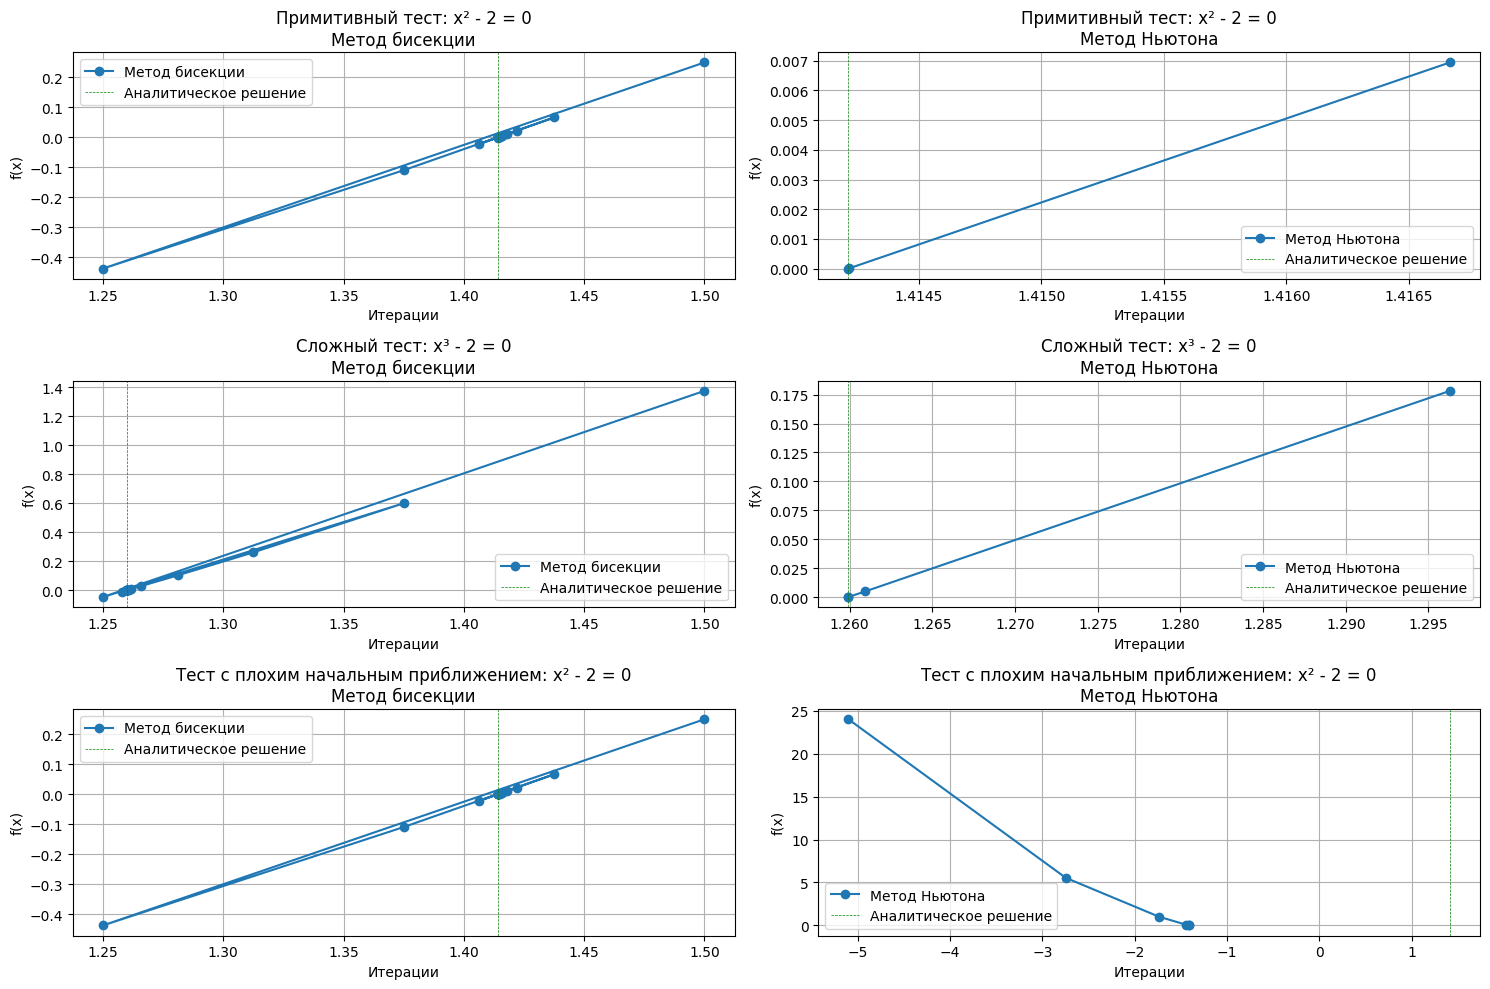

In [41]:
plt.figure(figsize=(15, 10))

for i, test in enumerate(tests):
    # Решение методом бисекции
    root_bisect, bisect_iterations = bisection_method(test['f'], test['a'], test['b'], 1e-6)

    # Решение методом Ньютона
    root_newton, newton_iterations = newton_method(test['f'], test['df'], test['x0'], 1e-6)

    # Визуализация для метода бисекции
    vizualisation(bisect_iterations, 'Метод бисекции', 2 * i + 1)

    # Визуализация для метода Ньютона
    vizualisation(newton_iterations, 'Метод Ньютона', 2 * i + 2)

plt.tight_layout()
plt.show()

# Вывод

*   Метод Ньютона сходится быстрее, чем метод бисекции
*   Для метода Ньютона, в отличие от метода бисекции, важно начальное приближение

